<a href="https://colab.research.google.com/github/Muppidathe/deep_learning/blob/main/torch_custom__dataset_dataLoader_transforms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("karakaggle/kaggle-cat-vs-dog-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/kaggle-cat-vs-dog-dataset


In [4]:
! mv /kaggle/input/kaggle-cat-vs-dog-dataset ./


Streaming output truncated to the last 5000 lines.
mv: cannot remove '/kaggle/input/kaggle-cat-vs-dog-dataset/kagglecatsanddogs_3367a/PetImages/Cat/7643.jpg': Read-only file system
mv: cannot remove '/kaggle/input/kaggle-cat-vs-dog-dataset/kagglecatsanddogs_3367a/PetImages/Cat/9608.jpg': Read-only file system
mv: cannot remove '/kaggle/input/kaggle-cat-vs-dog-dataset/kagglecatsanddogs_3367a/PetImages/Cat/12397.jpg': Read-only file system
mv: cannot remove '/kaggle/input/kaggle-cat-vs-dog-dataset/kagglecatsanddogs_3367a/PetImages/Cat/11444.jpg': Read-only file system
mv: cannot remove '/kaggle/input/kaggle-cat-vs-dog-dataset/kagglecatsanddogs_3367a/PetImages/Cat/4997.jpg': Read-only file system
mv: cannot remove '/kaggle/input/kaggle-cat-vs-dog-dataset/kagglecatsanddogs_3367a/PetImages/Cat/11760.jpg': Read-only file system
mv: cannot remove '/kaggle/input/kaggle-cat-vs-dog-dataset/kagglecatsanddogs_3367a/PetImages/Cat/8409.jpg': Read-only file system
mv: cannot remove '/kaggle/input/kag

In [14]:
import torch
from torch.utils.data import Dataset,DataLoader,random_split
from torchvision import transforms
from PIL import Image
import os
class customdataset(Dataset):
  def __init__(self,img_dir,transformer=None):
    self.img_dir=img_dir
    self.transformer=transformer
    self.class_names={}
    self.labels=[]
    self.img_paths=[]

    for label,class_name in enumerate(os.listdir(img_dir)):
      self.class_names[label]=class_name
      class_dir=os.path.join(img_dir,class_name)
      for image_name in os.listdir(class_dir):
        if image_name
        self.labels.append(label)
        image_path=os.path.join(class_dir,image_name)
        self.img_paths.append(image_path)
  def __len__(self):
    return len(self.img_paths)
  def __getitem__(self, idx):
    img=self.img_paths[idx]
    label=self.labels[idx]
    if self.transformer:
      img = Image.open(img).convert('RGB')
      img=self.transformer(img)
    return img,label
data_transformer=transforms.Compose([transforms.Resize((128,128)),transforms.ToTensor()])
dataset=customdataset('/content/kaggle-cat-vs-dog-dataset/kagglecatsanddogs_3367a/PetImages',data_transformer)
train_size = int(0.8 * len(dataset))  # 80% for training
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

train_dataloader=DataLoader(dataset=train_dataset,batch_size=32,shuffle=True)
test_dataloader=DataLoader(dataset=test_dataset,batch_size=32,shuffle=True)

In [23]:
for img,label in test_dataloader:
  print(img.shape,label.shape)

torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([3

In [22]:
!rm '/content/kaggle-cat-vs-dog-dataset/kagglecatsanddogs_3367a/PetImages/Dog/Thumbs.db'
!rm '/content/kaggle-cat-vs-dog-dataset/kagglecatsanddogs_3367a/PetImages/Cat/Thumbs.db'

rm: cannot remove '/content/kaggle-cat-vs-dog-dataset/kagglecatsanddogs_3367a/PetImages/Dog/Thumbs.db': No such file or directory
rm: cannot remove '/content/kaggle-cat-vs-dog-dataset/kagglecatsanddogs_3367a/PetImages/Cat/Thumbs.db': No such file or directory


Dog
(3, 128, 128)
(128, 128, 3)


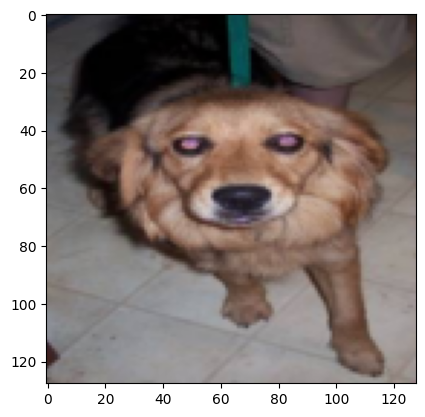

In [30]:
import numpy as np
import matplotlib.pyplot as plt
for img,label in test_dataloader:
  lbl=label[0].item()
  print(dataset.class_names[lbl])
  image=img[0].numpy()
  print(image.shape)
  img_T=np.transpose(image,(1,2,0))
  print(img_T.shape)
  plt.imshow(img_T,vmin=0,vmax=255)
  break